In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Private\Downloads\Assignment 4 2025.csv")
df.head(10)

df['event'] = 1 - df['censor']
numeric_cols = ['support_tickets', 'payment_delays', 'total_spend']
categorical_cols = ['industry_type', 'supplier_engagement']

X_numeric = df[numeric_cols].values
X_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)
feature_names = numeric_cols + X_categorical.columns.tolist()
X= np.hstack((X_numeric, X_categorical.values)).astype('float32')
X_df = pd.DataFrame(X, columns=feature_names, index=df.index)

df_exp = pd.DataFrame({
    'Duration': df['duration'].astype('float32'),
    'Event': df['event'].astype('float32')
}, index=df.index)

df_exp= pd.concat([df_exp, X_df], axis=1)
df_exp.head(10)

,Duration,Event,support_tickets,payment_delays,total_spend,industry_type_Automotive,industry_type_Electronics,industry_type_Energy,industry_type_Machinery,supplier_engagement_Low,supplier_engagement_Medium
0,882.0,1.0,6.0,11.0,31209.019531,0.0,0.0,0.0,1.0,1.0,0.0
1,900.0,0.0,19.0,18.0,38663.289062,1.0,0.0,0.0,0.0,0.0,0.0
2,900.0,0.0,14.0,43.0,41529.640625,1.0,0.0,0.0,0.0,1.0,0.0
3,900.0,0.0,10.0,58.0,34541.539062,1.0,0.0,0.0,0.0,1.0,0.0
4,900.0,0.0,7.0,48.0,10764.309570,0.0,0.0,0.0,0.0,1.0,0.0
5,900.0,0.0,6.0,60.0,20222.039062,0.0,0.0,1.0,0.0,0.0,1.0
6,900.0,0.0,18.0,16.0,46763.761719,1.0,0.0,0.0,0.0,0.0,1.0
7,900.0,0.0,10.0,73.0,15107.700195,0.0,1.0,0.0,0.0,1.0,0.0
8,806.0,1.0,10.0,56.0,21747.519531,1.0,0.0,0.0,0.0,0.0,1.0
9,900.0,0.0,3.0,54.0,24443.460938,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:
observed = df_exp.loc[df_exp['Event'] == 1, 'Duration']

In [4]:
log_t = np.log(observed)

In [5]:
# Fit Weibull (using SciPy’s weibull_min)
c_weibull, loc_w, scale_w = stats.weibull_min.fit(log_t, floc=0)

# Fit Lognormal
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(log_t, floc=0)

# Fit LOGLOGISTIC
c_ll, loc_ll, scale_ll = stats.fisk.fit(log_t, floc=0) 


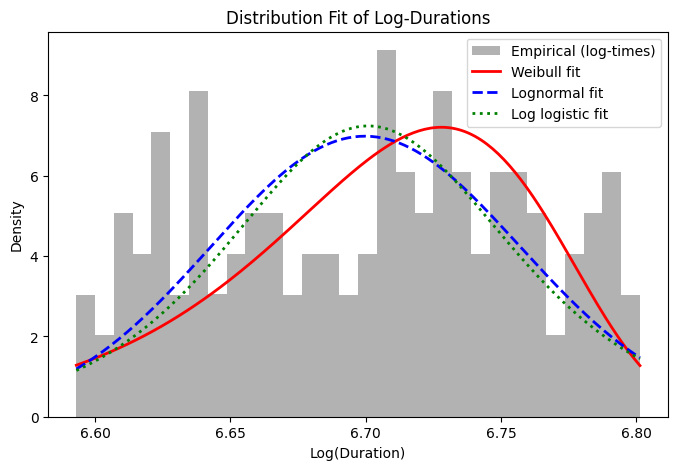

In [6]:
x = np.linspace(log_t.min(), log_t.max(), 200)

plt.figure(figsize=(8,5))
plt.hist(log_t, bins=30, density=True, alpha=0.6, color='gray', label='Empirical (log-times)')

plt.plot(x, stats.weibull_min.pdf(x, c_weibull, loc_w, scale_w), 'r-', lw=2, label='Weibull fit')
plt.plot(x, stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln), 'b--', lw=2, label='Lognormal fit')
plt.plot(x, stats.fisk.pdf(x, c_ll, loc_ll, scale_ll), 'g:', lw=2, label='Log logistic fit')

plt.xlabel('Log(Duration)')
plt.ylabel('Density')
plt.title('Distribution Fit of Log-Durations')
plt.legend()
plt.show()


In [9]:


# Fit Weibull
c_w, loc_w, scale_w = stats.weibull_min.fit(log_t, floc=0)

# Fit Lognormal (fits log(T))
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(log_t, floc=0)

# Fit Log-logistic (Fisk distribution in SciPy)
c_ll, loc_ll, scale_ll = stats.fisk.fit(log_t, floc=0)


In [10]:
# Empirical quantiles
prob = np.linspace(0.01, 0.99, 100)

# Theoretical quantiles
q_weibull = stats.weibull_min.ppf(prob, c_w, loc=loc_w, scale=scale_w)
q_lognorm = stats.lognorm.ppf(prob, shape_ln, loc=loc_ln, scale=scale_ln)
q_loglog = stats.fisk.ppf(prob, c_ll, loc=loc_ll, scale=scale_ll)

# Empirical quantiles from your data
q_emp = np.quantile(log_t, prob)


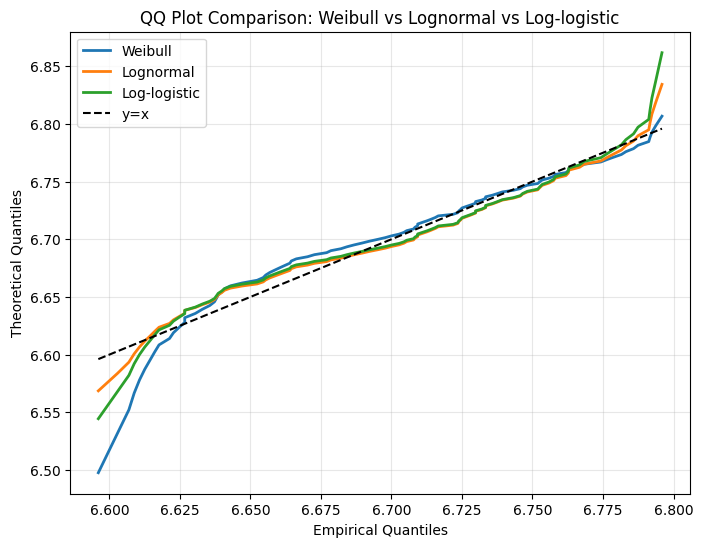

In [11]:
plt.figure(figsize=(8, 6))

plt.plot(q_emp, q_weibull, label='Weibull', lw=2)
plt.plot(q_emp, q_lognorm, label='Lognormal', lw=2)
plt.plot(q_emp, q_loglog, label='Log-logistic', lw=2)

# 45° line for reference
plt.plot(q_emp, q_emp, 'k--', label='y=x')

plt.xlabel('Empirical Quantiles')
plt.ylabel('Theoretical Quantiles')
plt.title('QQ Plot Comparison: Weibull vs Lognormal vs Log-logistic')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
